### Churn Prediction
FRE9733- Homework 3 

Deniz Kural - dk3703

1. Load Mocked_Customer_Data_With_Missing.xlsx into R/Python and save it as a data frame
2. Check the data completeness, and identify numeric vs categorical variables
3. Plot histograms of “age” group by “churn”
4. Conduct a t-test of “tot_bill” regarding “churn”
5. Fill out the missing values if any
6. Split the dataset into training and validation sets
7. Build a logistic regression model to predict “churn”
8. Conduct a K-fold cross validation 
9. Interpret the result
10. Test your model performance
	Calculate precision, recall, F1-Score, ROC 	
	Plot the ROC and precision-recall curves
11. See if any data transformation can improve the performance
12. Summarize your findings into a brief report

In [421]:
#Step 1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sn
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn import feature_selection

from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from IPython.display import display, HTML

In [422]:
#Import the dataset
df= pd.read_excel("/Users/denizkuraal/Desktop/FRE9733/Mocked_Customer_Data_With_Missing.xlsx")

In [423]:
#Step 2
#Evaluation of Dataset

#Visualize the dataset 
df.head()

,cust_id,churn_flag,gender,marrital,age,home_owner,num_cont,tot_bill,tot_call,tot_bal,fortune,tot_bytes,tot_air,num_out,google_bytes,google_air,yahoo_bytes,yahoo_air
0,c000001,1,Male,divorced,49.0,0,0,134.130817,53,4973.07,Mass,931.28,3046.90,194,320.52,1270.23,194.04,710.45
1,c000002,1,Male,divorced,33.0,0,1,121.247165,68,4528.01,Low,580.62,3549.74,331,491.50,1484.64,32.14,823.42
2,c000003,1,Female,divorced,38.0,0,1,164.144198,38,5565.09,Affluent,754.07,2996.59,139,283.24,764.69,182.07,718.69
3,c000004,1,Female,married,26.0,1,1,177.394137,80,5370.00,Affluent,384.81,2443.78,98,384.81,721.44,145.09,742.61
4,c000005,0,Male,single,55.0,0,2,155.183919,50,5101.25,Affluent,15.30,2576.98,294,15.30,774.92,15.30,710.88


In [424]:
df.columns

Index(['cust_id', 'churn_flag', 'gender', 'marrital', 'age', 'home_owner',
       'num_cont', 'tot_bill', 'tot_call', 'tot_bal', 'fortune', 'tot_bytes',
       'tot_air', 'num_out', 'google_bytes', 'google_air', 'yahoo_bytes',
       'yahoo_air'],
      dtype='object')

In [425]:
df.describe()

,churn_flag,age,home_owner,num_cont,tot_bill,tot_call,tot_bal,tot_bytes,tot_air,num_out,google_bytes,google_air,yahoo_bytes,yahoo_air
count,40000.000000,39957.000000,40000.000000,40000.000000,39967.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,0.513050,44.529820,0.600000,1.998875,124.984437,74.549700,5496.517940,1504.349711,2896.281553,153.802650,319.444523,901.499544,222.769098,675.602853
std,0.499836,11.093269,0.489904,0.773621,35.692830,35.646982,742.751898,696.499597,510.388510,103.381545,107.447809,222.361519,101.929949,159.983881
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2648.750000,0.330000,751.380000,0.000000,0.330000,27.130000,0.090000,161.970000
25%,0.000000,37.000000,0.000000,1.000000,99.209931,47.000000,4947.027500,977.340000,2554.792500,73.000000,249.170000,749.750000,151.130000,548.985000
50%,1.000000,45.000000,1.000000,2.000000,129.913113,70.000000,5453.905000,1502.130000,2891.220000,150.000000,321.185000,901.640000,221.905000,676.335000
75%,1.000000,52.000000,1.000000,3.000000,152.215100,100.000000,6023.875000,2024.902500,3239.507500,226.000000,391.730000,1053.460000,291.952500,801.922500
max,1.000000,87.000000,1.000000,5.000000,235.785533,219.000000,8158.480000,3827.720000,4977.580000,588.000000,759.000000,1794.100000,648.700000,1207.910000


In [426]:
#Display data types of the dataset
df.dtypes

cust_id          object
churn_flag        int64
gender           object
marrital         object
age             float64
home_owner        int64
num_cont          int64
tot_bill        float64
tot_call          int64
tot_bal         float64
fortune          object
tot_bytes       float64
tot_air         float64
num_out           int64
google_bytes    float64
google_air      float64
yahoo_bytes     float64
yahoo_air       float64
dtype: object

In [427]:
#Display the categorical vs. numerical variables

In [428]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['churn_flag', 'home_owner', 'num_cont', 'tot_call', 'num_out'], float64: ['age', 'tot_bill', 'tot_bal', 'tot_bytes', 'tot_air', 'google_bytes', 'google_air', 'yahoo_bytes', 'yahoo_air'], object: ['cust_id', 'gender', 'marrital', 'fortune']}

 <p> <b>Categorical Features:</b>  ['cust_id', 'gender', 'marrital', 'fortune'] </p>
 <p> <b>Numerical Features:</b>  </p>
 <p><b>Type int64</b> :  ['churn_flag', 'home_owner', 'num_cont', 'tot_call', 'num_out']</p>
 <p><b>Type float64</b>:  ['age', 'tot_bill', 'tot_bal', 'tot_bytes', 'tot_air', 'google_bytes', 'google_air', 'yahoo_bytes', 'yahoo_air']</p>

In [429]:
#Data Completeness
#Get the info. for both missing values in each column and also type of variables in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cust_id       40000 non-null  object 
 1   churn_flag    40000 non-null  int64  
 2   gender        40000 non-null  object 
 3   marrital      40000 non-null  object 
 4   age           39957 non-null  float64
 5   home_owner    40000 non-null  int64  
 6   num_cont      40000 non-null  int64  
 7   tot_bill      39967 non-null  float64
 8   tot_call      40000 non-null  int64  
 9   tot_bal       40000 non-null  float64
 10  fortune       39972 non-null  object 
 11  tot_bytes     40000 non-null  float64
 12  tot_air       40000 non-null  float64
 13  num_out       40000 non-null  int64  
 14  google_bytes  40000 non-null  float64
 15  google_air    40000 non-null  float64
 16  yahoo_bytes   40000 non-null  float64
 17  yahoo_air     40000 non-null  float64
dtypes: float64(9), int64(5), o

In [430]:
#Display the columns with missing variables if any
df.isna().any()

cust_id         False
churn_flag      False
gender          False
marrital        False
age              True
home_owner      False
num_cont        False
tot_bill         True
tot_call        False
tot_bal         False
fortune          True
tot_bytes       False
tot_air         False
num_out         False
google_bytes    False
google_air      False
yahoo_bytes     False
yahoo_air       False
dtype: bool

<h4>We can observe that columns "age, tot_bill, fortune" have missing values.

In [431]:
#A way to check uniquness in a categorical columns / features

In [432]:
#Unique values in each categorical variable:
df["marrital"].nunique()

3

In [433]:
df["marrital"].unique()

array(['divorced', 'married', 'single'], dtype=object)

In [434]:
df["fortune"].nunique()

3

In [435]:
df["fortune"].unique()

array(['Mass', 'Low', 'Affluent', nan], dtype=object)

Text(0.5, 0, 'Churn')

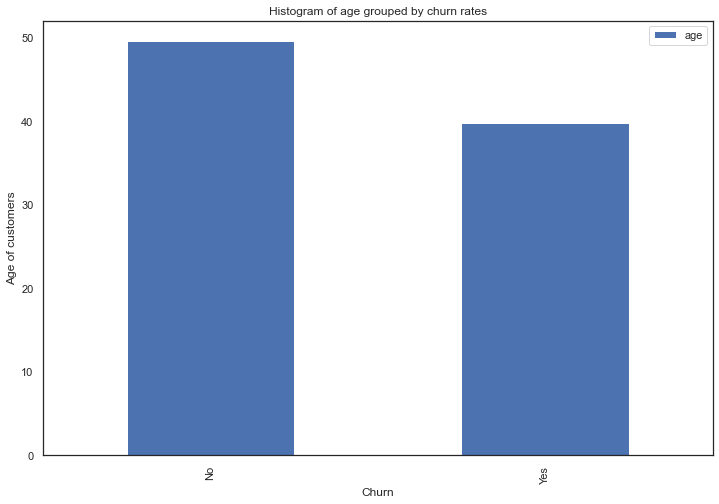

In [436]:
#Plot histograms of “age” group by “churn”
age_by_churn=df[['age','churn_flag']]
age_hist=age_by_churn.groupby(by='churn_flag').mean()
age_hist=age_hist.set_index([pd.Index(['No','Yes'])])
ax=age_hist.plot.bar(title="Histogram of age grouped by churn rates",legend=True,grid=False,figsize =(12, 8))
plt.ylabel('Age of customers')
plt.xlabel('Churn')

In [437]:
age_hist

,age
No,49.512795
Yes,39.798946


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 0, 'Age of Customers')

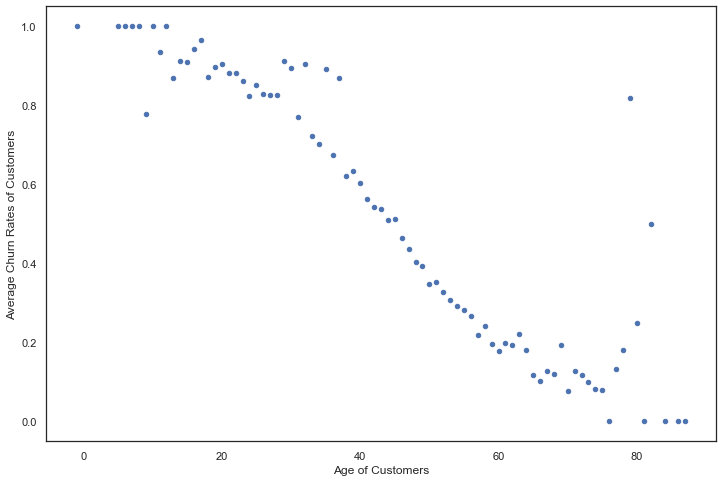

In [438]:
#Scatter Plot Observation
#Plot histograms of “age” group by “churn”
age_scatter=age_by_churn.groupby(by='age').mean().reset_index()
ax=age_scatter.plot.scatter(y='churn_flag',x='age',figsize=(12,8))
plt.ylabel('Average Churn Rates of Customers')
plt.xlabel('Age of Customers')

In [439]:
#Step 4
#Conduct a t-test of “tot_bill” regarding “churn”
#We omit the nan values at this point
ttest_ind(df['tot_bill'],df['churn_flag'],nan_policy='omit')

Ttest_indResult(statistic=697.3903437102781, pvalue=0.0)

As we can see from the result, T statistic is really high and p value is also really low as expected. This shows us that we can reject the null hyphotesis and the both distrubutions (populations) are very likely to be different. 

<AxesSubplot:>

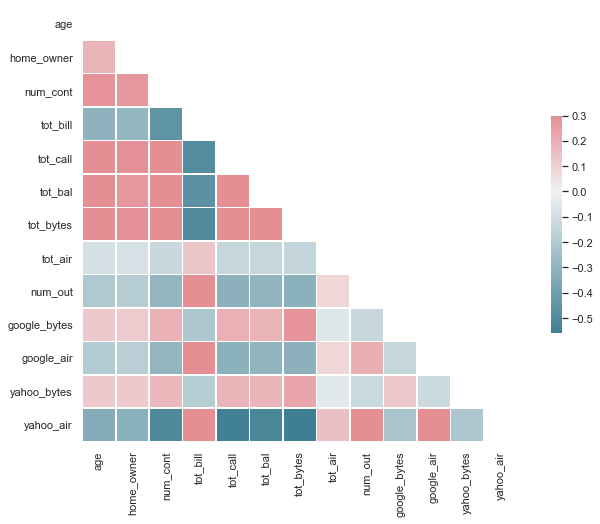

In [440]:
#We can also display the correlation matrix in order to observer collinearity between predictors.
#Set and compute the Correlation Matrix:
sn.set(style="white")
df_corr=df.drop(['cust_id','churn_flag'],axis=1)
corr = df_corr.corr()

#Generate a mask for the upper triangle:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Set up the matplotlib figure and a diverging colormap:
f, ax = plt.subplots(figsize=(12, 8))
cmap = sn.diverging_palette(220, 10, as_cmap=True)
#Draw the heatmap with the mask and correct aspect ratio:
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})

<p><b>Step 5</b></p>
<p>Fill out the missing values if any</p>
<p>At the previous  steps, we showed that there are missing values for "age, tot_bill, fortune" columns. There are several ways to handle with them.
<p>We can now observe how many missing (NaN, NA) values we have for each feature in the below section. 

In [441]:
print(df.isnull().sum())

cust_id          0
churn_flag       0
gender           0
marrital         0
age             43
home_owner       0
num_cont         0
tot_bill        33
tot_call         0
tot_bal          0
fortune         28
tot_bytes        0
tot_air          0
num_out          0
google_bytes     0
google_air       0
yahoo_bytes      0
yahoo_air        0
dtype: int64


As we can see we don't have considerable amount of missing data if we think about the dataset size which is 40000.So, we can basically remove the rows with missing data to handle.

In [442]:
df.dropna(inplace=True)

In [443]:
print(df.isnull().sum())

cust_id         0
churn_flag      0
gender          0
marrital        0
age             0
home_owner      0
num_cont        0
tot_bill        0
tot_call        0
tot_bal         0
fortune         0
tot_bytes       0
tot_air         0
num_out         0
google_bytes    0
google_air      0
yahoo_bytes     0
yahoo_air       0
dtype: int64


As we can see, now we have no missing values in the columns.

In [444]:
#Step 6
#Split the dataset into training and validation sets

In [445]:
#Create label encoder for feature with less than or equal to 2  unique values
#In our case, this will be only gender column with 2 unique values ['male','female']

#Create a label encoder object
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0

for col in df.columns[1:]:
    if df[col].dtype == 'object':
        #print(col)
        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1
            
print('{} columns were label encoded.'.format(le_count))

1 columns were label encoded.


In [446]:
#For larger than 2 unique values ,we need to create dummies.
#This will be done for ['fortune', 'marrital'] features in our case.

#Cust_id is an object and we do not want to get dummies for cust_id 
identity = df["cust_id"]
df = df.drop(columns="cust_id")

df= pd.get_dummies(df)

df = pd.concat([df, identity], axis = 1)

In [447]:
#Identify response variable (churn):
    
response = df["churn_flag"]
df = df.drop(columns="churn_flag")

In [448]:
# Step 6 
# Split the dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(df , response,test_size=0.25, random_state=1)

In [449]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (29924, 21)
Number transactions X_test dataset:  (9975, 21)
Number transactions y_train dataset:  (29924,)
Number transactions y_test dataset:  (9975,)


In [450]:
train_id = X_train['cust_id']
X_train = X_train.drop(columns = ['cust_id'])

test_id = X_test['cust_id']
X_test = X_test.drop(columns = ['cust_id'])

In [451]:
# Step 7
# Build a logistic regression model to predict “churn”

#Normalization

sc_X = StandardScaler()

X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [452]:
#Model Implementation "Logistic Regression"
model = LogisticRegression(solver= 'liblinear')

In [453]:
#Conduct a K-fold cross validation 
kfold = model_selection.KFold(n_splits=10, random_state=None)

In [454]:
#Interpret the result
result = cross_val_score(model , X_train, y_train, cv = kfold)
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.9344007228988852


In [455]:
# accuracy scoring by cross-validation:
cv_acc_results = model_selection.cross_val_score(  
model, X_train, y_train, cv=kfold, scoring='accuracy')
print("Avg accuracy: {}".format(cv_acc_results.mean()))

# roc_auc scoring  by cross-validation:
cv_auc_results = model_selection.cross_val_score(  
model, X_train, y_train, cv=kfold, scoring='roc_auc')
print("Avg Roc AUC score: {}".format(cv_auc_results.mean()))


Avg accuracy: 0.9344007228988852
Avg Roc AUC score: 0.9499072682699193


In [456]:
#Test your model performance
#Calculate precision, recall, F1-Score, ROC 
#Plot the ROC and precision-recall curves

# Fitting Logistic Regression to the Training set
model.fit(X_train, y_train)
# Predicting the Test set results
y_pred = model.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)


results = pd.DataFrame([['Logistic Regression', 
acc, prec, rec, f1, f2]], columns = ['Model', 
'Accuracy', 'Precision', 'Recall', 'F1 Score', 
'F2 Score'])
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.933634   0.943673  0.926402  0.934958  0.929805


As we can see form the results, the model is very accurate and we can explain up tp 95% variance in the test set with predictions. Also, both recall and precision scores are very high indicating good predictive model.

Text(0.5, 510.88, 'Predicted label')

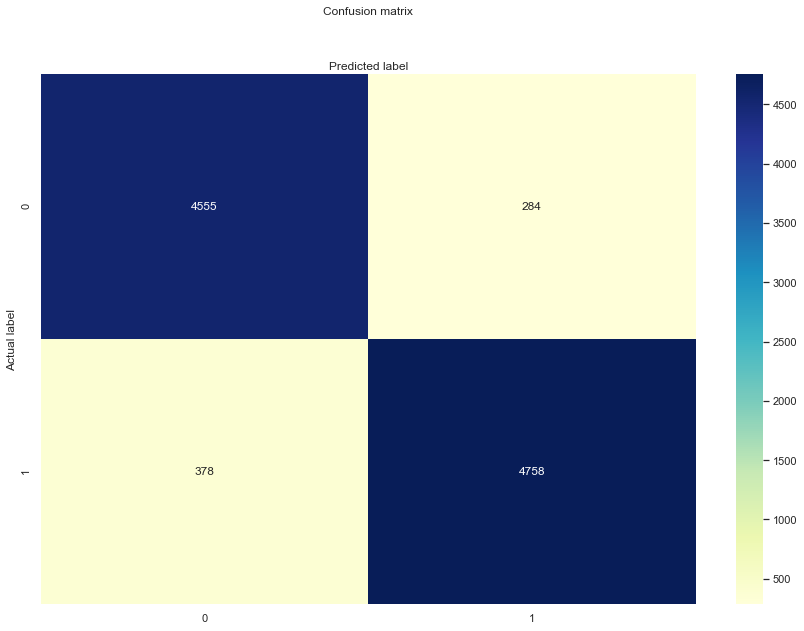

In [457]:
#Confusion Matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(12,8))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sn.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


<p> </p>
From the confusion matrix, we can again observe the recall and precision scores. If we examine the confusion matrix, we can see that TP=4758, TN= 4555 while FN=378 and FP=284. These scores help us to calculate recall, precision and f-score. Remember that recall=TP/(TP+FN) and Precision= TP/(TP+FP)

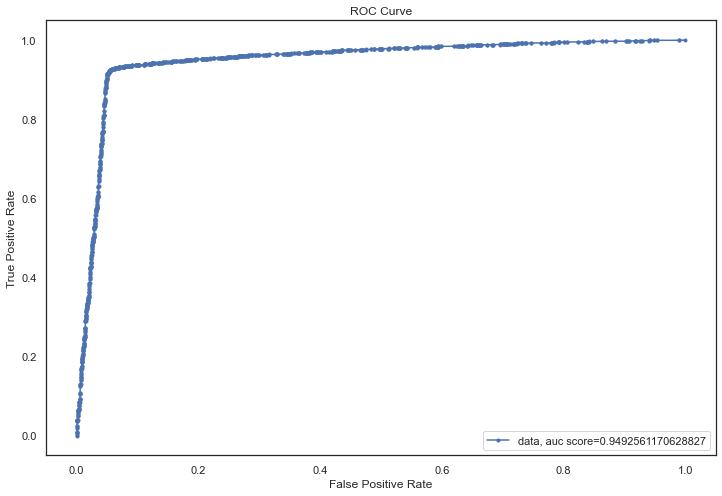

In [458]:
#AUC Curve

y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(fpr,tpr,label="data, auc score="+str(auc),marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

ROC curve can be observed above with an AUC score of 0.95 approximately. We are interested in AUC score to identify how well our model is a classifier. Random classifier would have AUC score of 0.50 and we have 0.95 which is significantly better and shows that we can use the model as a very good classifier!

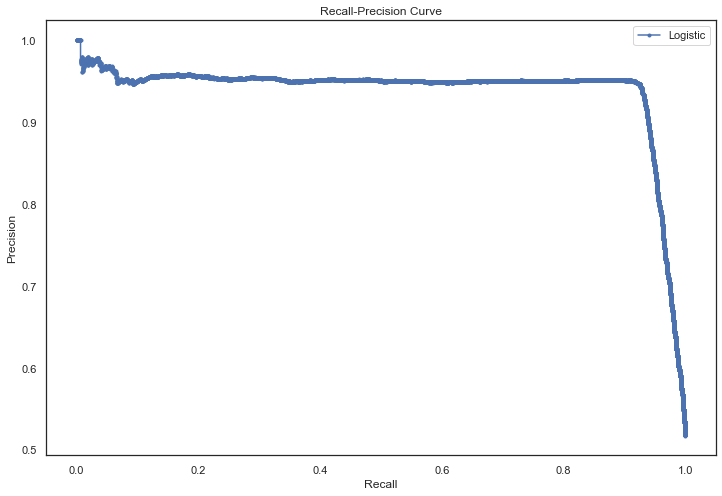

In [459]:
#Recall Precision Curve

lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred_proba)
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(lr_recall, lr_precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Recall-Precision Curve')
plt.legend()
plt.show()

In the given above figure, we can observe the tradeoff between recall-precision and in a good classifier model, we both want recall and precision to be high close to 1. This is because high recall indicates low false negative rate and high precision rate indicates, low false positive rate. The results of precision and recall in our model was 0.943673  0.926402 ,respectively. Thus, we can say that our model is very close to ideal where it predicts the labels of the dataset almost correctly with very few FP and FN rates.

In [460]:
#Let's observe feature importance in our dataset
feature_importances = pd.concat([
pd.DataFrame(df.columns, columns = ["features"]),
pd.DataFrame(np.transpose(model.coef_), 
columns = ["coef"])],axis = 1)
feature_importances.sort_values("coef", ascending = False)

,features,coef
13,yahoo_air,0.735915
4,tot_bill,0.487623
11,google_air,0.215078
9,num_out,0.176250
8,tot_air,0.048483
19,fortune_Mass,0.037693
16,marrital_single,0.008384
15,marrital_married,0.006835
14,marrital_divorced,-0.015308
18,fortune_Low,-0.015941


As we can see from above table, yahoo_air is by far most effective feature while predicting churn rate and also, we can conclude that churn rate seems to increase when we observe customer's total bill, yahoo air time, google air time and number of timeouts increases. Meanwhile, we can also conclude that churn rate decreases when number of contracts, the age of customer and total bytes increases. 

We can use transformation methods such as hypermater selection in order to get more accurate results by adding a penaly term which can be Ridge or Lasso penalty terms or regression.

In [461]:
#Regularization by Grid Search which means we will enter each hypermater to find optimal penalty value.

penalty=['l1','l2'] #L1 -> Ridge  ;  L2-> Lasso
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000] # Create regularization hyperparameter space
parameters=dict(C=C,penalty=penalty)

logit_method=GridSearchCV(estimator=model,param_grid=parameters,scoring="balanced_accuracy",cv=10,n_jobs=-1)
logit_method.fit(X_train,y_train)


best_accuracy_reg=logit_method.best_score_
best_parameters_reg=logit_method.best_params_
print("The best score and the corresponding parameters for the score are:" ,best_accuracy_reg,"    ",best_parameters_reg)


The best score and the corresponding parameters for the score are: 0.9360789117778185      {'C': 0.001, 'penalty': 'l2'}


As observed from the score above, we can conclude that with l2 (lasso) regressioa and a penalty value of 0.001 did give us more accurate solution comparison to without using penalty term which indicates that indeed, we were overfitting the model a little bit as the accuracy goes up by 0.002 with regularization.

In [462]:
lr_classifier = LogisticRegression(random_state = 0, penalty = 'l2')
lr_classifier.fit(X_train, y_train)
# Predict the Test set results
y_pred = lr_classifier.predict(X_test)
#probability score
y_pred_probs = lr_classifier.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1]

In [463]:
#Evaluate test set results when we use l2 penalty 
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)



results = pd.DataFrame([['Logistic Regression', 
acc, prec, rec, f1, f2]], columns = ['Model', 
'Accuracy', 'Precision', 'Recall', 'F1 Score', 
'F2 Score'])
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.933534   0.943486  0.926402  0.934866  0.929769


In [464]:
#Comments about the Results

final_results = pd.concat([test_id, y_test], axis = 1).dropna()

final_results['predictions'] = y_pred
final_results["churn_rate(%)"] = y_pred_probs
final_results["churn_rate(%)"] = final_results["churn_rate(%)"]*100
final_results["churn_rate(%)"]=final_results["churn_rate(%)"].round(2)
final_results = final_results[['cust_id', 'churn_flag', 'predictions', 'churn_rate(%)']]
final_results ['Ranking'] = pd.qcut(final_results['churn_rate(%)'].rank(method = 'first'),10,labels=range(10,0,-1))
print (final_results)

       cust_id  churn_flag  predictions  churn_rate(%) Ranking
37267  c037268           0            0           3.66       9
36289  c036290           0            0           6.61       8
21411  c021412           0            0          37.23       6
13592  c013593           1            1          93.02       4
17964  c017965           1            1          97.98       2
...        ...         ...          ...            ...     ...
37830  c037831           0            0          11.37       7
10028  c010029           1            1          98.50       1
9984   c009985           1            1          96.05       3
6355   c006356           1            1          96.18       3
37208  c037209           1            0           1.83      10

[9975 rows x 5 columns]


In [465]:
#This is to display all result / unnecessary for now...
#display(HTML(final_results.to_html()))

In [466]:
sort_by_ranking=final_results.sort_values('Ranking',ascending=False)
sort_by_ranking.head(10)

,cust_id,churn_flag,predictions,churn_rate(%),Ranking
18129,c018130,0,1,98.61,1
7103,c007104,1,1,98.44,1
6477,c006478,1,1,98.71,1
8481,c008482,1,1,98.73,1
8042,c008043,1,1,98.45,1
2066,c002067,1,1,98.31,1
3649,c003650,1,1,98.28,1
5061,c005062,1,1,98.61,1
4402,c004403,1,1,99.06,1
15266,c015267,1,1,99.58,1


As we can see from the above table, these customers with given identities are very likely to churn or churn already as can be observed from the churn_flags. By doing estimations and ranking the customers with the probabilities of churn, we can approach the customer's problems and them in order to continue their subscriptions.

In [467]:
sort_by_ranking=final_results.sort_values('Ranking',ascending=True)
sort_by_ranking.head(10)

,cust_id,churn_flag,predictions,churn_rate(%),Ranking
37208,c037209,1,0,1.83,10
31048,c031049,0,0,2.04,10
33233,c033234,0,0,1.66,10
30227,c030228,0,0,1.91,10
30355,c030356,0,0,2.14,10
25908,c025909,0,0,1.84,10
27677,c027678,0,0,2.22,10
29770,c029771,0,0,1.50,10
36258,c036259,0,0,0.91,10
23430,c023431,0,0,0.51,10


Again, if we want to display low risk profile customers for churning we can just simply filter like this. And if there are some unexpected mislabel results, we can approach to customers to learn the reasons for churning. 

As conclusion, we built a logistic regression model with given dataset in order to find the probability of churn for the future ccustomers. We observe that the logistic regression model with L2 penalty term give us highlya ccurate outcomes. Also, we interpret the results by metrics/scores such as accuracy, recall, precision and F1. We also display the ROC curve besides recall-precision curve. At the end, we illustrate the risky profile and low risk profile customers in a table.